# Fit Logistic Regression Model
This notebook shows how to fit a regularized logistic regression model so as to optimize approximate leave-one-out cross-validation.

See [Optimizing Approximate Leave-ont-out Cross-validation to Tune Hyperparameters](https://arxiv.org/abs/2011.10218) for details.

## Import Dependencies

In [1]:
library(PeakEngines)
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.0-2



## Load Data Set

In [2]:
data("PimaIndiansDiabetes2", package = "mlbench")
df <- na.omit(PimaIndiansDiabetes2)
indexes <- which(!names(df) %in% c("diabetes"))
df[,indexes] <- scale(df[,indexes])

## Fit Logistic Regression Model

In [3]:
fit <- glmAlo(diabetes ~ ., data = df, family = binomial)
lambda <- fit$lambda

## Verify Hyperameters
Plot leave-one-out cross-validation to verify the hyperparameters approximately minimized it.

In [4]:
computeLo <- function(lambda, df) {
  nobs <- nrow(df)
  x <- model.matrix(diabetes ~ ., df)[,-1]
  y <- ifelse(df$diabetes == "pos", 1, 0)
  lambda <- 2 * lambda / (nobs - 1)
  result <- 0
  for (i in 1:nobs) {
    x_test <- x[c(i),, drop=F]
    x_train <- x[-i,]
    y_test <- y[c(i)]
    y_train <- y[-i]
    fit <- glmnet(x_train, y_train, family="binomial", alpha=0, lambda=lambda, standardize=FALSE)
    pred <- predict(fit, newx=x_test, type="response")
    if (y[i]) {
      result <- result + log(pred[1])
    } else {
      result <- result + log(1 - pred[1])
    }
  }
  -result / nobs
}

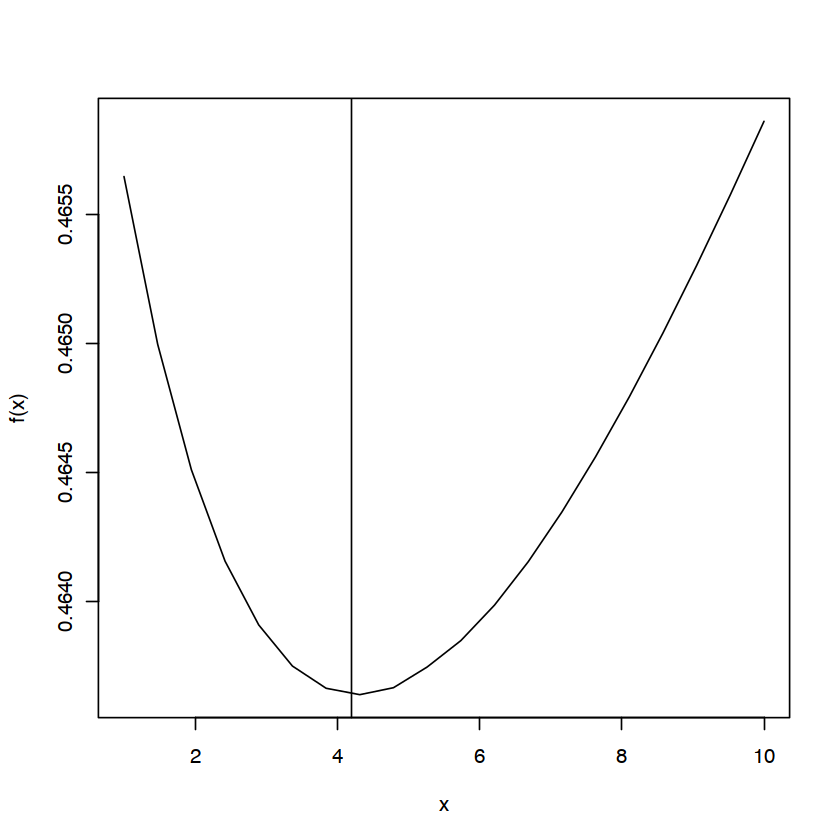

In [5]:
f <- function(lambdas) {
    result <- rep(0, 10)
    for (i in 1:length(lambdas)) {
        result[i] <- computeLo(lambdas[i], df)
    }
    result
}
curve(f(x), from=1, to=10,  n=20)
abline(v = lambda)